
# Week 3  Lab - Exploratory Data Analysis (EDA)

<img align="right" style="padding-right:10px;" src="figures_wk3/curious.png" width=300><br>
This week's assignment will focus on EDA techniques and practices for a given dataset.

## Dataset for Week3: 
**Dataset Name::** <br>
Use any dataset that is of interest to you for this assignment.

   * https://archive.ics.uci.edu/ml/datasets.php
   * https://www.data.gov/
   * https://www.kaggle.com/datasets


# Assignment Requirements

Complete an Exploratory data analysis for the dataset of your choice. Define a few questions that you wish to discover about your dataset to guide your EDA effort. Your analysis should include the items listed below. Make sure you have clearly indicated each assignment requirement within your notebook. For each of the items, document your approach, providing reasoning for your treatment of the data and insights or conclusions that you have reached. Use the [Lab Format](https://colab.research.google.com/drive/1VeVhtWCSG5s4ifEP45hAy3Bk7ncEDG4Y#scrollTo=1g6ks2wEL_y_&line=3&uniqifier=1) document as a guideline for your write up.

Define a few questions that you wish to discover about your dataset to guide your EDA effort.
  
**Important:** Make sure your provide complete and thorough explanations for all of your analysis steps. You need to defend your thought processes and reasoning.

# Define a few questions that you wish to discover about your dataset to guide your EDA effort.
  
**Important:** Make sure your provide complete and thorough explanations for all of your analysis steps. You need to defend your thought processes and reasoning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('adult.csv', 
                 names=[
    'age', 
    'workclass', 
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
                     'income-range'
],
                index_col=False)

## 1. Describe the data within the dataset.
       - Data types: Categorical vs Continuous variables
       - Statistical summary, etc.

The data is already clean (: This is a dataset from an analysis pulling data from the 1994 census to document people who make under and over .$50k a year.

From:
Becker, B. and Kohavi, R. (1996). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Census+Income]. Irvine, CA: University of California, School of Information and Computer Science.

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Data Set name: Census Income Data Set
Dataset URL: ./https://archive.ics.uci.edu/ml/datasets/Census+Income/.
Data Set Abstract: "Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset." (Kohavi, 1996)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income-range    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


I had to input the column names from the [adult_names.csv](adult_names.csv) 

**Continuous Variables:** age, fnlwage, education-num, capital gail, capital-loss, hours-per-week

**Categorical Variables:** workclass, education,, marital-status, occupation, relationship, race, sex, native-country

In [5]:
df.shape

(32561, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


 ## 2. Data Cleaning
       - Identify and handle missing values
       - Identify and handle outliers

Outliers <--- use set_index to create index row on dataset.

In [7]:
#df['index_col'] = df.index

In [8]:
#df.set_index(keys='index_col', inplace=True)

I just wanted to add an index key to separate instances if need be. Now I will look for outliers since the data doesn't have any missing values _(God bless 🙏)_ 

***I have various questions:*** 
- What is the difference in educations and income levels between of males vs females?

<AxesSubplot:>

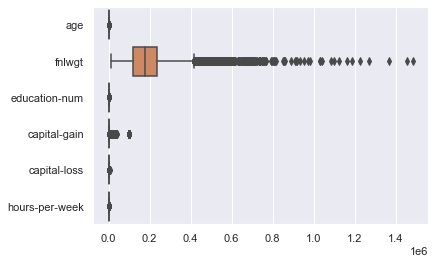

In [9]:
sns.boxplot(data=df, orient='h')

I don't really know what is contributing to fnlwgt and it isn't useful to my questions so I am just going to drop it.

In [10]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income-range          2
dtype: int64

In [12]:
df.drop(columns='fnlwgt', inplace=True)

<AxesSubplot:>

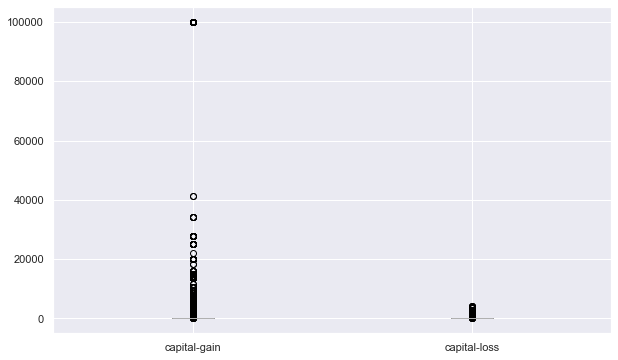

In [13]:
df.boxplot(column=['capital-gain', 'capital-loss'], figsize=(10,6))

In [14]:
df.loc[df['capital-gain'] == 0].value_counts(df['income-range'])

income-range
 <=50K    23685
 >50K      6164
dtype: int64

In [15]:
df.loc[df['capital-loss'] > 0].value_counts(df['income-range'])

income-range
 >50K     773
 <=50K    746
dtype: int64

I am more interested in the information about people who are making 50K without capital gains or losses. For example I want to know how much their annual salary is not how much they make playing the stock market, etc. I will only keep information about people with 0 capital gain and 0 capital loss.

In [16]:
df = df[df['capital-gain'] == 0]

In [17]:
df = df[df['capital-loss'] == 0]

In [18]:
df.shape

(28330, 14)

In [19]:
df['workclass'].value_counts()

 Private             19982
 Self-emp-not-inc     2128
 Local-gov            1772
 ?                    1655
 State-gov            1134
 Self-emp-inc          832
 Federal-gov           808
 Without-pay            12
 Never-worked            7
Name: workclass, dtype: int64

I really don't care about "?", Without-pay, and 'Never-worked" for my questions. I'm going to remove them as well.

In [20]:
df = df[df.workclass != ' ?']
df = df[df.workclass != ' Without-pay']
df = df[df.workclass != ' Never-worked']

In [21]:
df['workclass'].value_counts()

 Private             19982
 Self-emp-not-inc     2128
 Local-gov            1772
 State-gov            1134
 Self-emp-inc          832
 Federal-gov           808
Name: workclass, dtype: int64

In [22]:
df['native-country'].value_counts()

 United-States                 23805
 Mexico                          581
 ?                               471
 Philippines                     163
 Germany                         108
 Puerto-Rico                      99
 Canada                           91
 El-Salvador                      90
 Cuba                             82
 India                            79
 Jamaica                          77
 England                          74
 Dominican-Republic               64
 South                            62
 Italy                            60
 Guatemala                        59
 China                            57
 Vietnam                          54
 Columbia                         52
 Poland                           50
 Japan                            49
 Haiti                            40
 Taiwan                           36
 Iran                             34
 Portugal                         32
 Nicaragua                        29
 Peru                             28
 

Let's stick to the continental US for now

In [23]:
df = df[df['native-country'] == ' United-States']

In [24]:
df.shape

(23805, 14)

Now that I all instances are without capital gains or losses and are all in the US I will remove those columns for clarity

In [25]:
df = df.drop(columns=['capital-gain','capital-loss','native-country'])

<AxesSubplot:>

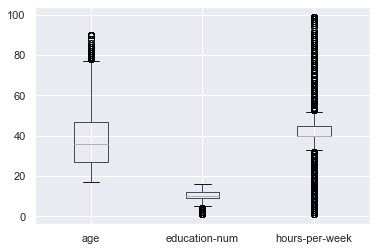

In [26]:
df.boxplot()

Very interesting that there are people over the age of 80 still working. Overall I am happy with the results. There is quite a bit of outliers for age education and hours per week. The majority of ages are from about 30-50 with the longer whisker being above the mean. Hours per week has dence outliers past the whiskers from almost 0 hours worked to 100 hours worked per week. Overall I find this to be valuable information for context to the conditions of our labor force from the 1994 census data.

In [27]:
df.to_csv('adult0_cleaned.csv',index=False)
df.to_csv('adult_cleaned.csv',index=False)

In [28]:
df = pd.read_csv('adult_cleaned.csv')

In [29]:
df.nunique()

age               72
workclass          6
education         16
education-num     16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
hours-per-week    94
income-range       2
dtype: int64

In [30]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income-range
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
3,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,<=50K
4,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,>50K


I want to assign numerical values to my categorical variables

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['race'] = le.fit_transform(df['race'])
df['workclass'] = le.fit_transform(df['workclass'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['education'] = le.fit_transform(df['relationship'])

In [32]:
df.rename(columns={"sex":"male"}, inplace=True)
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,male,hours-per-week,income-range
0,50,4,0,13,2,3,0,4,1,13,<=50K
1,38,2,1,9,0,5,1,4,1,40,<=50K
2,53,2,0,7,2,5,0,2,1,40,<=50K
3,37,2,5,14,2,3,5,4,0,40,<=50K
4,52,4,0,9,2,3,0,4,1,45,>50K
...,...,...,...,...,...,...,...,...,...,...,...
23800,22,2,1,10,4,10,1,4,1,40,<=50K
23801,27,2,5,12,2,12,5,4,0,38,<=50K
23802,40,2,0,9,2,6,0,4,1,40,>50K
23803,58,2,4,9,6,0,4,4,0,40,<=50K


In [33]:
df.to_csv('adult_cleaned_1.csv',index=False)
df = pd.read_csv('adult_cleaned.csv')
df1 = pd.read_csv('adult_cleaned_1.csv')

In [34]:
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df['race'],prefix='race')],axis=1)

In [35]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df['workclass'],prefix='workclass')],axis=1)

In [36]:
df = pd.concat([df.drop('education', axis=1), pd.get_dummies(df['education'],prefix='education')],axis=1)

In [37]:
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'],prefix=' marital-status')],axis=1)

In [38]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df['occupation'],prefix='occupation')],axis=1)

In [39]:
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df['relationship'],prefix='relationship')],axis=1)

In [40]:
df = pd.concat([df.drop('income-range', axis=1), pd.get_dummies(df['income-range'],prefix='income-range')],axis=1)

In [41]:
adultcorr_1 = df1.corr()
df

,age,education-num,sex,hours-per-week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income-range_ <=50K,income-range_ >50K
0,50,13,Male,13,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,38,9,Male,40,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,53,7,Male,40,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,37,14,Female,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,52,9,Male,45,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23800,22,10,Male,40,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
23801,27,12,Female,38,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
23802,40,9,Male,40,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
23803,58,9,Female,40,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


  ## 3. Feature Selection
       - Graphical visualization of features 
       - Examine the relationships within the dataset - using 2 different methods
       - Reduction of the dimensionality of the dataset

In [42]:
df0 = pd.read_csv('adult0_cleaned.csv')

<AxesSubplot:>

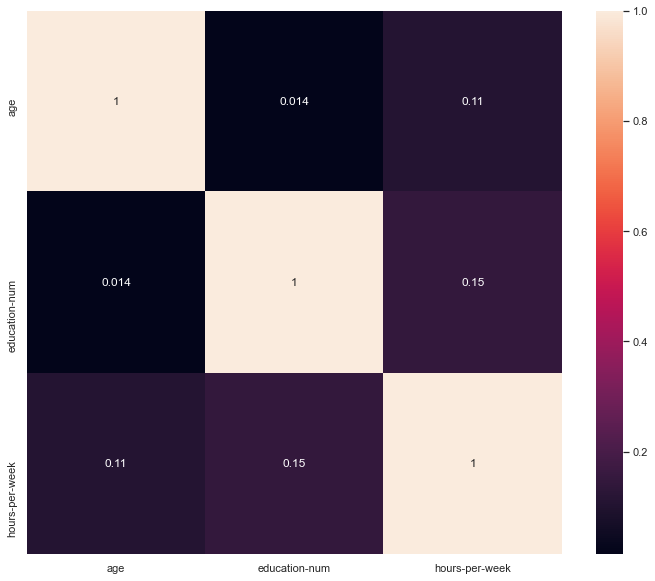

In [43]:
corr = df0.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

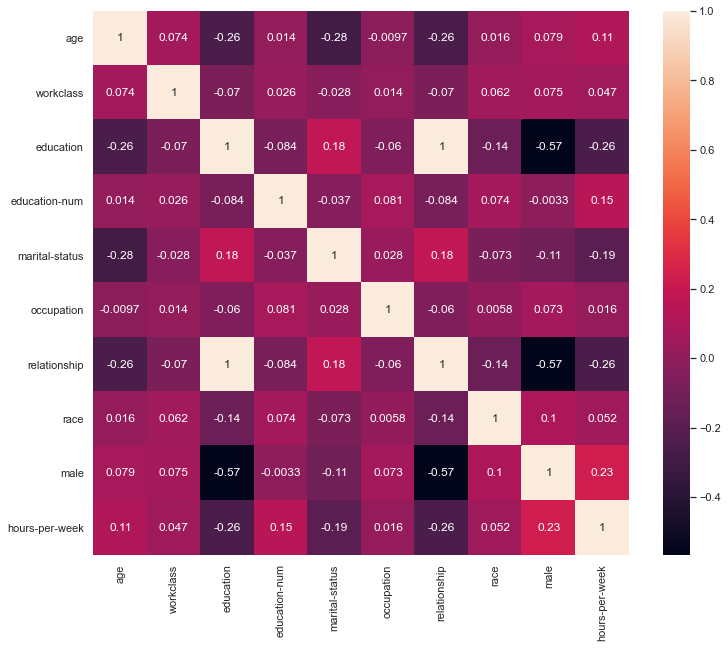

In [44]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(adultcorr_1, annot=True)

<AxesSubplot:>

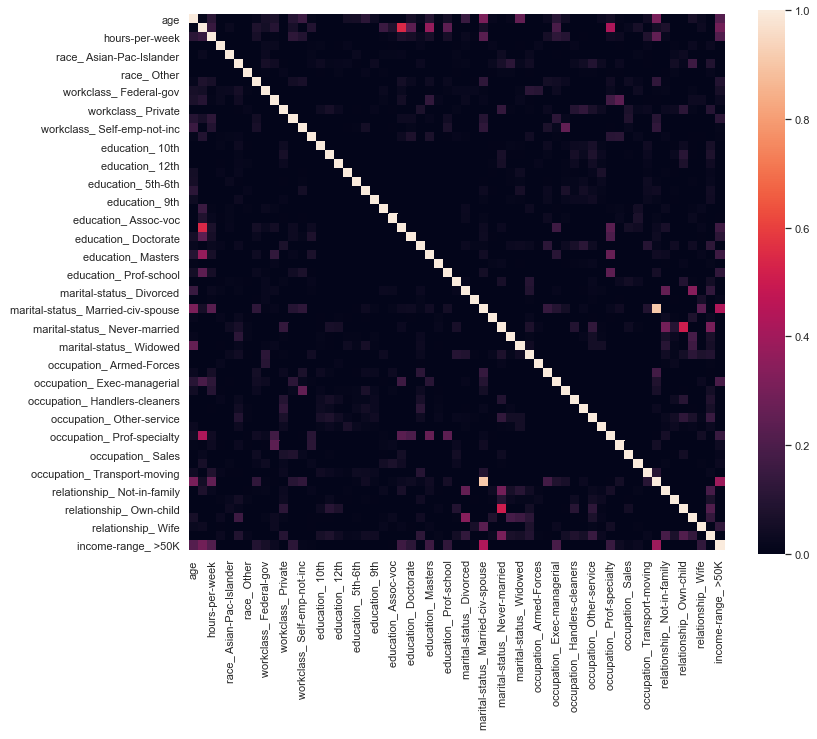

In [45]:
adultcorr = df.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(adultcorr, vmin = 0, square=True)

<function matplotlib.pyplot.show(close=None, block=None)>

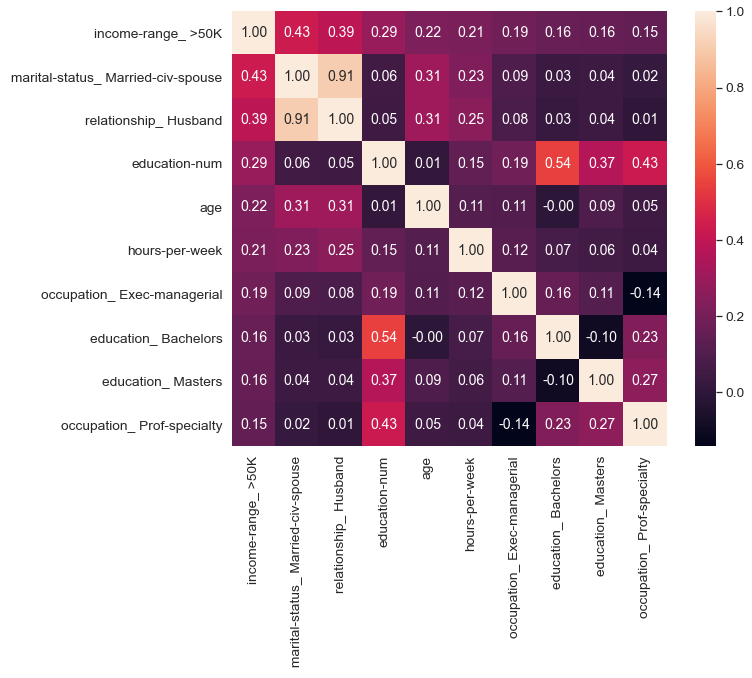

In [46]:
k = 10
cols = adultcorr.nlargest(k, 'income-range_ >50K')['income-range_ >50K'].index

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
f, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':14},yticklabels=cols.values, xticklabels=cols.values)
plt.show

In [47]:
X = df1[adultcorr_1.columns[:-1]]
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,male
0,50,4,0,13,2,3,0,4,1
1,38,2,1,9,0,5,1,4,1
2,53,2,0,7,2,5,0,2,1
3,37,2,5,14,2,3,5,4,0
4,52,4,0,9,2,3,0,4,1
...,...,...,...,...,...,...,...,...,...
23800,22,2,1,10,4,10,1,4,1
23801,27,2,5,12,2,12,5,4,0
23802,40,2,0,9,2,6,0,4,1
23803,58,2,4,9,6,0,4,4,0


In [48]:
y = df1['occupation'].values
y

array([3, 5, 5, ..., 6, 0, 0], dtype=int64)

In [49]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X,y)
importance_list = list(zip(X.columns, model.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance

[('occupation', 1.0),
 ('age', 0.0),
 ('workclass', 0.0),
 ('education', 0.0),
 ('education-num', 0.0),
 ('marital-status', 0.0),
 ('relationship', 0.0),
 ('race', 0.0),
 ('male', 0.0)]

In [50]:
max_feature_len = len(max(X.columns, key=len))

In [51]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

occupation: .... 100.00%
age: ........... 0.00%
workclass: ..... 0.00%
education: ..... 0.00%
education-num: . 0.00%
marital-status:  0.00%
relationship: .. 0.00%
race: .......... 0.00%
male: .......... 0.00%


This is a poor dataset because it doesn't show the actual value of their income. I needed a continuous variable. I suppose using capital gains would work but it wouldn't answer the questions I needed. I could look for the original census dataset and concat the two. I'm not going to.

##   4. Insights and Findings
       - Describe an insights and/or findings from within the datset.

Overall I found obvious variables that were correlated. For example, being a husband and in a married status was an almost 100% correlation. Though, I found it strange that the education and relationship variables were very correlated. I would have to very clearly narrow down variables to answer specific questions with this dataset but would be much more insightful with additional variables.

##   5. Bonus: Feature Engineering
       - Create a new feature based for findings.
       
       Average education by gender

In [52]:
edu_gen_wage = df0.groupby(['income-range','sex']).agg({'education-num':['min','max', 'mean', 'median', 'count']})

In [53]:
edu_gen_wage.reset_index()

income-range      sex education-num                             
                                  min max       mean median  count
0        <=50K   Female             1  16   9.949561     10   7395
1        <=50K     Male             1  16   9.615013      9  11603
2         >50K   Female             5  16  11.688953     12    688
3         >50K     Male             2  16  11.394756     11   4119

The average education level of a female making less than or equal to 50k per year is approaching 10th grade in highschool. Surprisingly the average education level of a female that makes over 50k a year is nearing graduation of highschool. 